In [ ]:
!pwd

/content


In [ ]:
cd drive

/content/drive


In [ ]:
cd /content/drive/MyDrive/597/

/content/drive/MyDrive/597


# **Datasets and Data Analysis**

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(42)

# globals

# k-mer word size
kmer_size = 3

# protein/sst3 sequence size limts
minlen = 100
maxlen = 400

In [ ]:
# Load the various datasets

# updated data with 25% identity and 2.0 Angstrom cutoffs
ss_2022_25_20 = pd.read_csv('/content/drive/MyDrive/597/secdataset/2022-12-17-pdb-intersect-pisces_pc25_r2.0.csv')

# updated data with 25% identity and 2.5 Angstrom cutoffs
ss_2022_25_25 = pd.read_csv('/content/drive/MyDrive/597/secdataset/2022-12-17-pdb-intersect-pisces_pc25_r2.5.csv')

# updated data with 30% identity and 2.5 Angstrom cutoffs
ss_2022_30_25 = pd.read_csv('/content/drive/MyDrive/597/secdataset/2022-12-17-pdb-intersect-pisces_pc30_r2.5.csv')

# 2018
ss_2018 = pd.read_csv('/content/drive/MyDrive/597/secdataset/2018-06-06-pdb-intersect-pisces.csv')

# the full, unfiltered dataset from mid-2022
# duplicates are dropped and the first instance kept
ss_cleaned = pd.read_csv('/content/drive/MyDrive/597/secdataset/2022-08-03-ss.cleaned.csv').drop_duplicates(subset = 'seq', keep = 'first')

# CASP
test_df_casp12 = pd.read_csv('/content/drive/MyDrive/597/secdataset/test_secondary_structure_casp12.csv')
# CB513
test_df_cb513 = pd.read_csv('/content/drive/MyDrive/597/secdataset/test_secondary_structure_cb513.csv')
#TS115
test_df_ts115 = pd.read_csv('/content/drive/MyDrive/597/secdataset/test_secondary_structure_ts115.csv')


In [ ]:
tbl_data = [['ss_2018', '25%', '2.0 Angstrom', len(ss_2018)],
            ['ss_2022_25_20', '25%', '2.0 Angstrom', len(ss_2022_25_20)],
            ['ss_2022_25_25', '25%', '2.5 Angstrom', len(ss_2022_25_25)],
            ['ss_2022_30_25', '30%', '2.5 Angstrom', len(ss_2022_30_25)],
            ['ss_cleaned', '0%', '0 Angstrom', len(ss_cleaned)]]
pd.DataFrame(tbl_data, columns = ['Dataset', 'Percent Identity Cutoff',
                                  'Resolution Cutoff', 'Number of Sequences'])

,Dataset,Percent Identity Cutoff,Resolution Cutoff,Number of Sequences
0,ss_2018,25%,2.0 Angstrom,9078
1,ss_2022_25_20,25%,2.0 Angstrom,8313
2,ss_2022_25_25,25%,2.5 Angstrom,10931
3,ss_2022_30_25,30%,2.5 Angstrom,15079
4,ss_cleaned,0%,0 Angstrom,112700


In [ ]:
tbl_data_test = [['casp12', len(test_df_casp12)],
            ['cb513', len(test_df_cb513)],
            ['ts115', len(test_df_ts115)]]
pd.DataFrame(tbl_data_test, columns = ['Dataset', 'Number of Sequences'])

,Dataset,Number of Sequences
0,casp12,21
1,cb513,513
2,ts115,115


In [ ]:
len(ss_cleaned)

112700

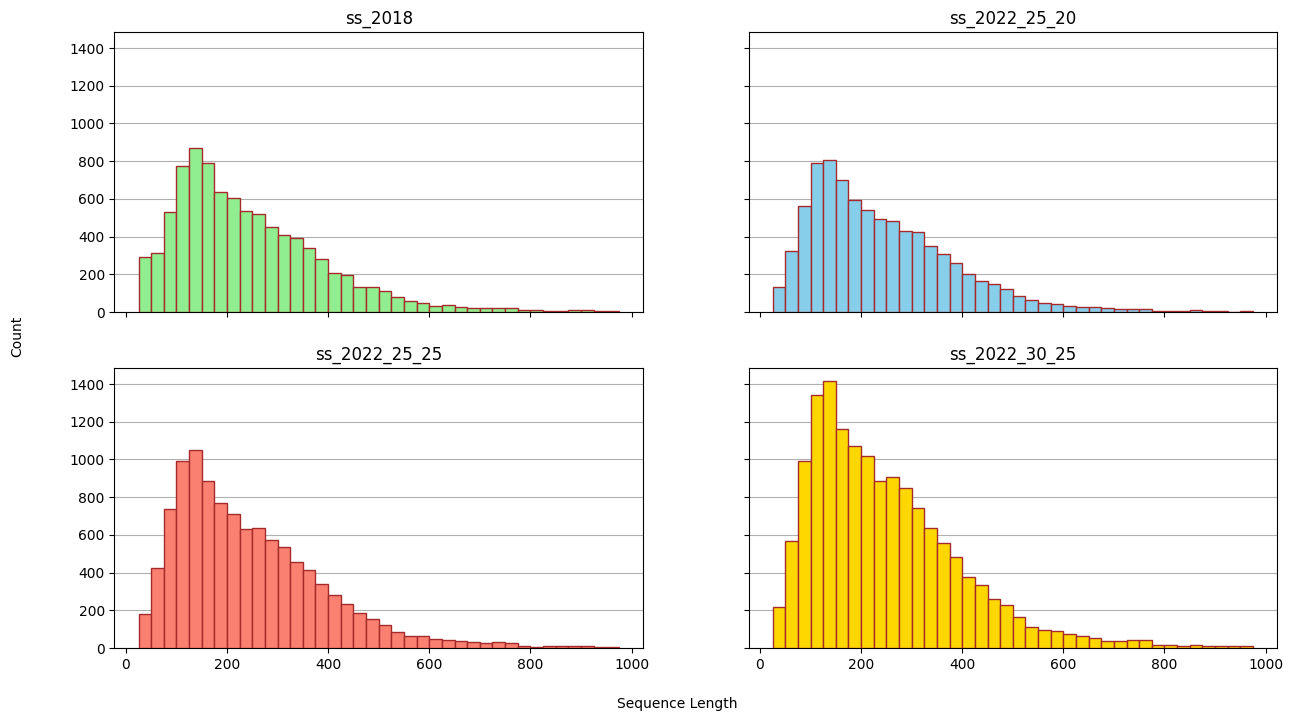

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'ss_2018', 'ss_2022_25_20', 'ss_2022_25_25', 'ss_2022_30_25' are your dataframes and 'len', 'len_x' are the columns of interest

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 8))

bins = range(25, 1000, 25) # bins are truncated at 1000 as there are very few sequences beyond this length

# Plot for ss_2018
axs[0, 0].hist(ss_2018['len'], bins=bins, color='lightgreen', zorder=3, edgecolor='brown', linewidth=1.0)
axs[0, 0].grid(axis='y', which='both', zorder=0)
axs[0, 0].title.set_text('ss_2018')

# Plot for ss_2022_25_20
axs[0, 1].hist(ss_2022_25_20['len_x'], bins=bins, color='skyblue', zorder=3, edgecolor='brown', linewidth=1.0)
axs[0, 1].grid(axis='y', which='both', zorder=0)
axs[0, 1].title.set_text('ss_2022_25_20')

# Plot for ss_2022_25_25
axs[1, 0].hist(ss_2022_25_25['len_x'], bins=bins,  color='salmon', zorder=3, edgecolor='brown', linewidth=1.0)
axs[1, 0].grid(axis='y', which='both', zorder=0)
axs[1, 0].title.set_text('ss_2022_25_25')

# Plot for ss_2022_30_25
axs[1, 1].hist(ss_2022_30_25['len_x'], bins=bins, color='gold', zorder=3, edgecolor='brown', linewidth=1.0)
axs[1, 1].grid(axis='y', which='both', zorder=0)
axs[1, 1].title.set_text('ss_2022_30_25')

# Set common labels
fig.text(0.5, 0.04, 'Sequence Length', ha='center', va='center')  # X-axis label
fig.text(0.06, 0.5, 'Count', ha='center', va='center', rotation='vertical')  # Y-axis label

plt.show()


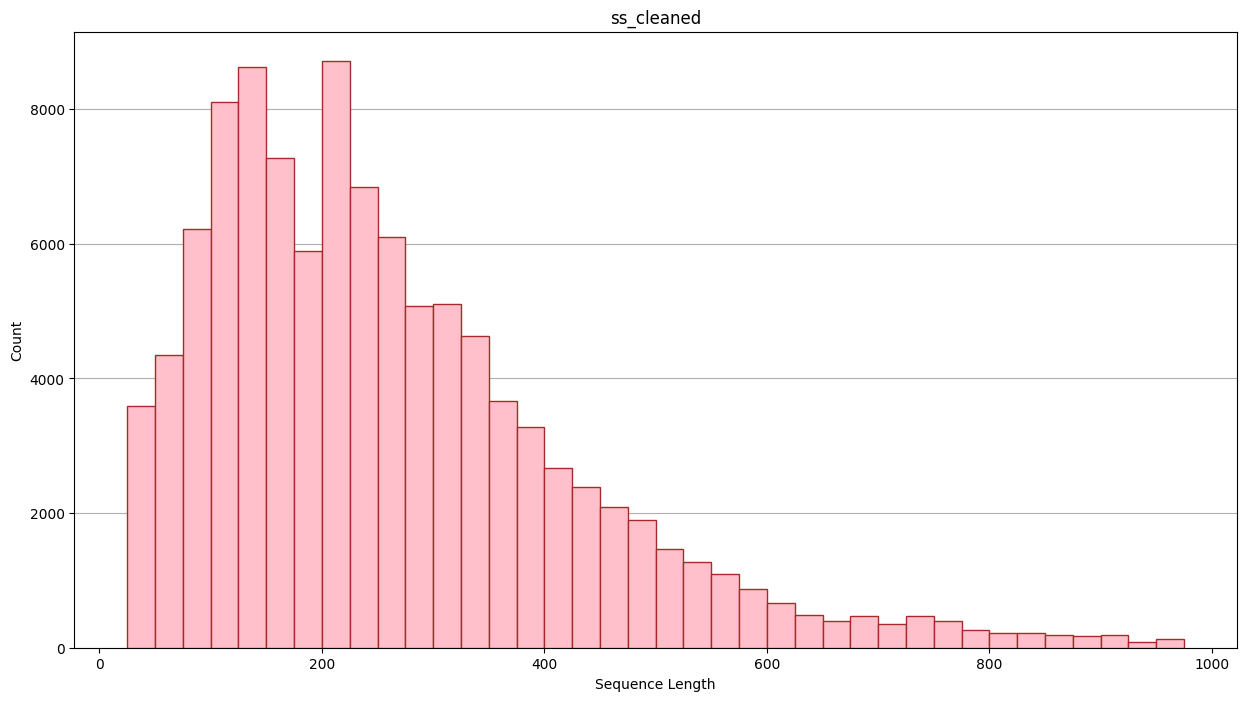

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(15, 8))

bins = range(25, 1000, 25) # Bins are truncated at 1000 as there are very few sequences beyond this length

# Plot for ss_cleaned
axs.hist(ss_cleaned['len'], bins=bins, color='pink', zorder=3, edgecolor='brown', linewidth=1.0)
axs.grid(axis='y', which='both', zorder=0)
axs.set_title('ss_cleaned')

# Set common labels
axs.set_xlabel('Sequence Length')  # X-axis label
axs.set_ylabel('Count')  # Y-axis label

plt.show()

### Secondary Structure Distibutions

The bar plots, below, show the numbers of each secondary structure type for SST-8 and SST-3 categories.  The bars are color coded by their SST-3 groupings in order to illustrate which SST-8 types are collected into SST-3 types.  The one letter abbreviations for SST-8 and SST-3 are:

SST-8 Type | Description | SST-3 Type | Description |
--- | --- | --- | --- |
B | $\beta$-bridge | E | Sheets |
E | $\beta$-strand | E |
G | 3-helix | H | Helices |
H | $\alpha$-helix | H |
I | $\pi$-helix | H |
C | Coil | C | Irregular or extended |
S | Bend | C |
T | Turn | C |

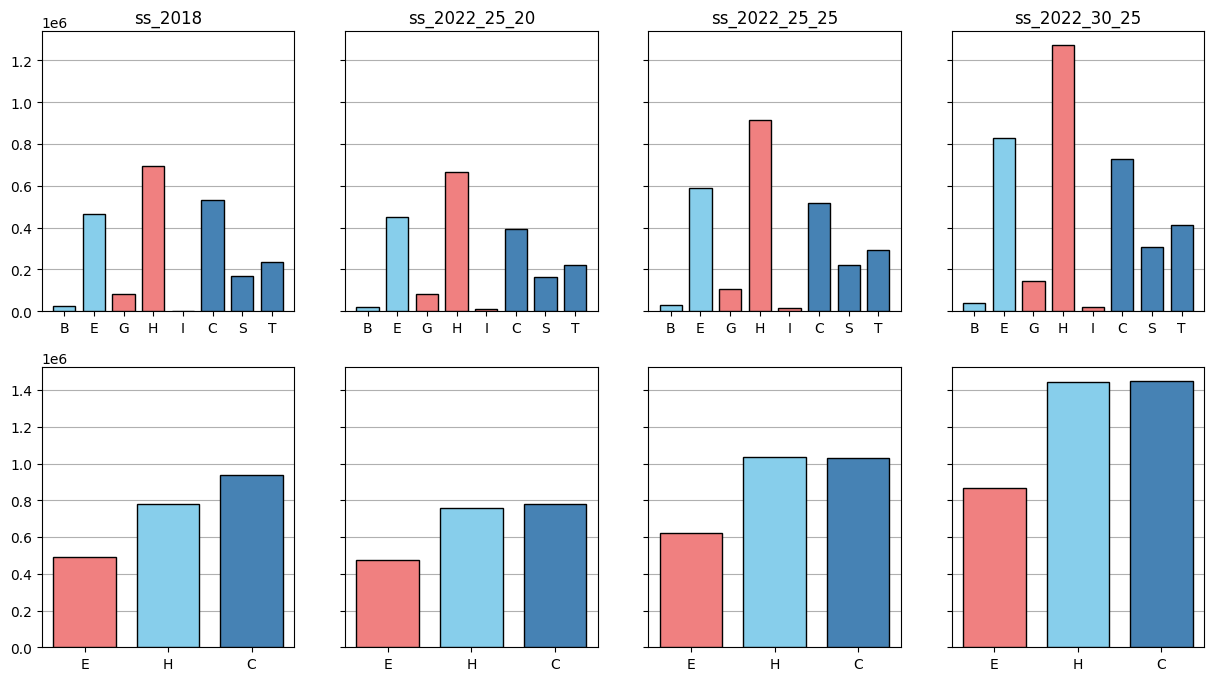

In [ ]:
from collections import defaultdict
# set up storage for all files, both SST categoreis and the types of SST for each category
SS_counts = {'ss_2018': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0) },
             'ss_2022_25_20': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0) },
             'ss_2022_25_25': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0) },
             'ss_2022_30_25': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0) },
             'ss_cleaned': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0) }
             }

# count the types for each dataset
for seq in ss_2018['sst8']:
    for ss in set(seq):
        SS_counts['ss_2018']['SST-8'][ss] += seq.count(ss)

for seq in ss_2018['sst3']:
    for ss in set(seq):
        SS_counts['ss_2018']['SST-3'][ss] += seq.count(ss)

for seq in ss_2022_25_20['sst8']:
    for ss in set(seq):
        SS_counts['ss_2022_25_20']['SST-8'][ss] += seq.count(ss)

for seq in ss_2022_25_20['sst3']:
    for ss in set(seq):
        SS_counts['ss_2022_25_20']['SST-3'][ss] += seq.count(ss)

for seq in ss_2022_25_25['sst8']:
    for ss in set(seq):
        SS_counts['ss_2022_25_25']['SST-8'][ss] += seq.count(ss)

for seq in ss_2022_25_25['sst3']:
    for ss in set(seq):
        SS_counts['ss_2022_25_25']['SST-3'][ss] += seq.count(ss)

for seq in ss_2022_30_25['sst8']:
    for ss in set(seq):
        SS_counts['ss_2022_30_25']['SST-8'][ss] += seq.count(ss)

for seq in ss_2022_30_25['sst3']:
    for ss in set(seq):
        SS_counts['ss_2022_30_25']['SST-3'][ss] += seq.count(ss)

for seq in ss_cleaned['sst8']:
    for ss in set(seq):
        SS_counts['ss_cleaned']['SST-8'][ss] += seq.count(ss)

for seq in ss_cleaned['sst3']:
    for ss in set(seq):
        SS_counts['ss_cleaned']['SST-3'][ss] += seq.count(ss)
# plot a comparison across datasets

# define order for ss types
ss8_types = ['B', 'E', 'G', 'H', 'I', 'C', 'S', 'T']
ss3_types = ['E', 'H', 'C']

# sst8_colors = ['gold', 'gold', 'crimson', 'crimson', 'crimson', 'navy', 'navy', 'navy']
# sst3_colors = ['gold', 'crimson', 'navy']

sst8_colors = ['skyblue', 'skyblue', 'lightcoral', 'lightcoral', 'lightcoral', 'steelblue', 'steelblue', 'steelblue']
sst3_colors = ['lightcoral', 'skyblue', 'steelblue']

fig, axs = plt.subplots(2, 4, sharey = 'row', figsize = (15, 8))

axs[0, 0].bar(range(8), height = [SS_counts['ss_2018']['SST-8'][ss] for ss in ss8_types],
              tick_label = ss8_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst8_colors)
axs[0, 0].grid(axis = 'y', which = 'both', zorder = 0)
axs[0, 0].title.set_text('ss_2018')

axs[1, 0].bar(range(3), height = [SS_counts['ss_2018']['SST-3'][ss] for ss in ss3_types],
              tick_label = ss3_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst3_colors)
axs[1, 0].grid(axis = 'y', which = 'both', zorder = 0)

axs[0, 1].bar(range(8), height = [SS_counts['ss_2022_25_20']['SST-8'][ss] for ss in ss8_types],
              tick_label = ss8_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst8_colors)
axs[0, 1].grid(axis = 'y', which = 'both', zorder = 0)
axs[0, 1].title.set_text('ss_2022_25_20')

axs[1, 1].bar(range(3), height = [SS_counts['ss_2022_25_20']['SST-3'][ss] for ss in ss3_types],
              tick_label = ss3_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst3_colors)
axs[1, 1].grid(axis = 'y', which = 'both', zorder = 0)

axs[0, 2].bar(range(8), height = [SS_counts['ss_2022_25_25']['SST-8'][ss] for ss in ss8_types],
              tick_label = ss8_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst8_colors)
axs[0, 2].grid(axis = 'y', which = 'both', zorder = 0)
axs[0, 2].title.set_text('ss_2022_25_25')

axs[1, 2].bar(range(3), height = [SS_counts['ss_2022_25_25']['SST-3'][ss] for ss in ss3_types],
              tick_label = ss3_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst3_colors)
axs[1, 2].grid(axis = 'y', which = 'both', zorder = 0)

axs[0, 3].bar(range(8), height = [SS_counts['ss_2022_30_25']['SST-8'][ss] for ss in ss8_types],
              tick_label = ss8_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst8_colors)
axs[0, 3].grid(axis = 'y', which = 'both', zorder = 0)
axs[0, 3].title.set_text('ss_2022_30_25')

axs[1, 3].bar(range(3), height = [SS_counts['ss_2022_30_25']['SST-3'][ss] for ss in ss3_types],
              tick_label = ss3_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst3_colors)
axs[1, 3].grid(axis = 'y', which = 'both', zorder = 0)

fig.show()

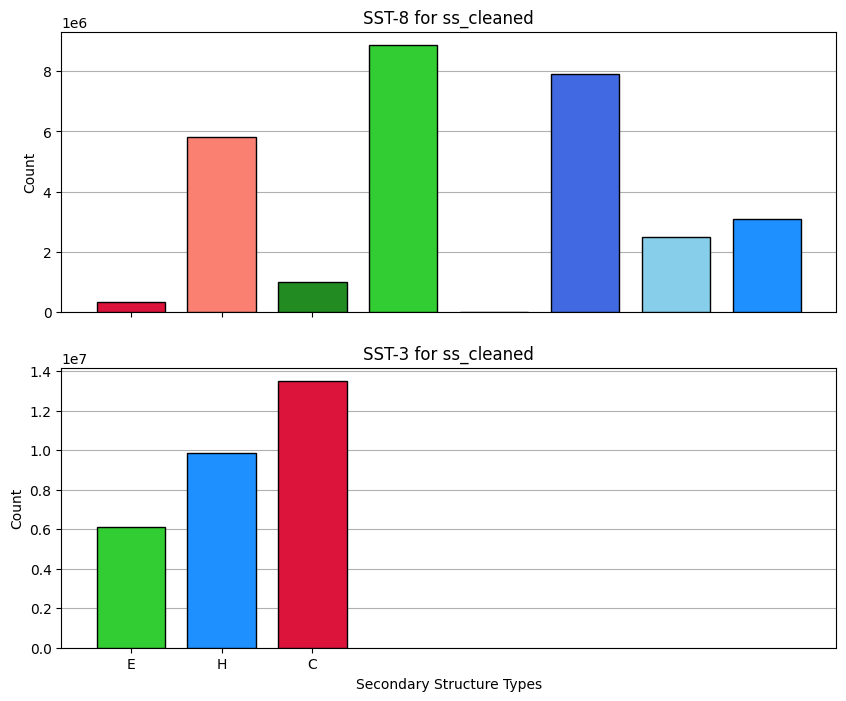

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize the dictionary for ss_cleaned
SS_counts = {'ss_cleaned': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0)}}

# Assuming data ingestion for ss_cleaned
# Dummy loop for example purposes, replace with your actual data processing logic
for seq in ss_cleaned['sst8']:  # Assuming 'sst8' and 'sst3' columns exist in ss_cleaned
    for ss in set(seq):
        SS_counts['ss_cleaned']['SST-8'][ss] += seq.count(ss)
for seq in ss_cleaned['sst3']:
    for ss in set(seq):
        SS_counts['ss_cleaned']['SST-3'][ss] += seq.count(ss)

# Define order and new colors for ss types
ss8_types = ['B', 'E', 'G', 'H', 'I', 'C', 'S', 'T']
ss3_types = ['E', 'H', 'C']
# sst8_colors = ['skyblue', 'skyblue', 'lightcoral', 'lightcoral', 'lightcoral', 'steelblue', 'steelblue', 'steelblue']
# sst3_colors = ['lightcoral', 'skyblue', 'steelblue']

sst8_colors = ['crimson', 'salmon', 'forestgreen', 'limegreen', 'darkgreen', 'royalblue', 'skyblue', 'dodgerblue']
sst3_colors = ['limegreen', 'dodgerblue', 'crimson']

# Create a subplot grid
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 8))  # Two rows for SST-8 and SST-3

# Bar plot for SST-8
axs[0].bar(range(8), [SS_counts['ss_cleaned']['SST-8'][ss] for ss in ss8_types],
           tick_label=ss8_types, edgecolor='black', width=0.75, zorder=3, color=sst8_colors)
axs[0].grid(axis='y', which='both', zorder=0)
axs[0].set_title('SST-8 for ss_cleaned')

# Bar plot for SST-3
axs[1].bar(range(3), [SS_counts['ss_cleaned']['SST-3'][ss] for ss in ss3_types],
           tick_label=ss3_types, edgecolor='black', width=0.75, zorder=3, color=sst3_colors)
axs[1].grid(axis='y', which='both', zorder=0)
axs[1].set_title('SST-3 for ss_cleaned')

# Adding some axis labels for clarity
axs[1].set_xlabel('Secondary Structure Types')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')

plt.show()


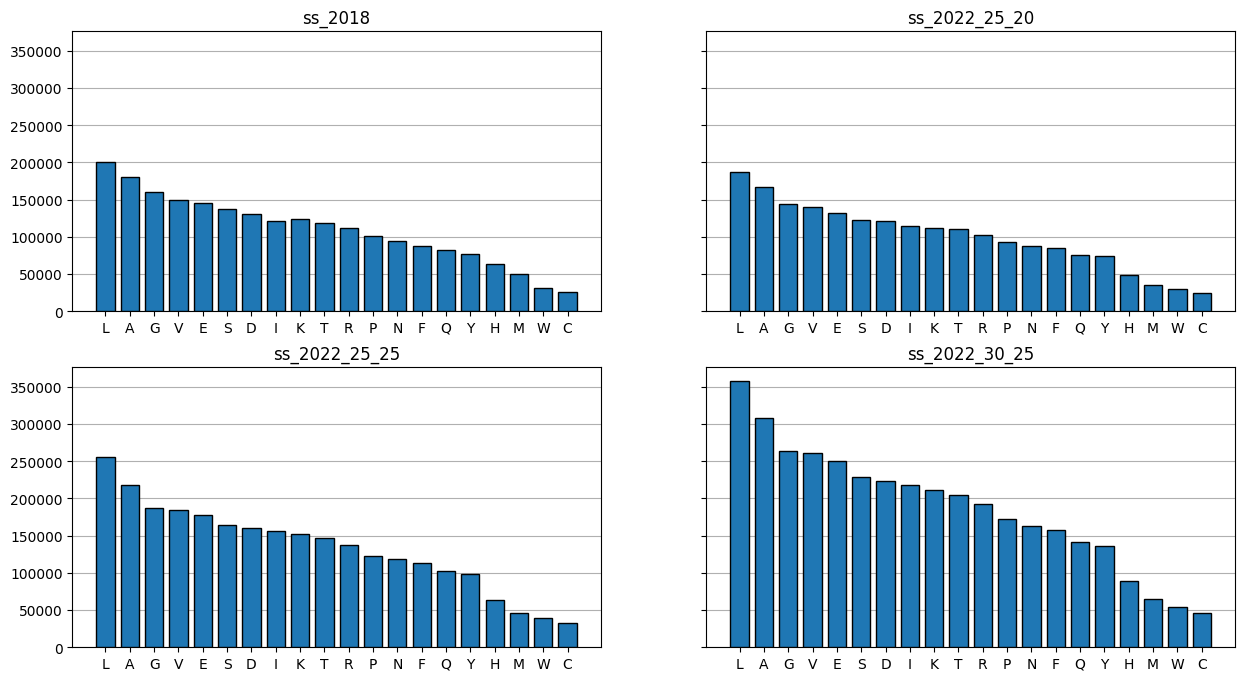

In [ ]:
# set up storage for all files
AA_counts = {'ss_2018': defaultdict(lambda: 0),
             'ss_2022_25_20': defaultdict(lambda: 0),
             'ss_2022_25_25': defaultdict(lambda: 0),
             'ss_2022_30_25': defaultdict(lambda: 0)}

# count the types for each dataset
for (seq, nonstd) in zip(ss_2018['seq'], ss_2018['has_nonstd_aa']):
    if not nonstd:
        for aa in set(seq):
            if aa != '*':
                AA_counts['ss_2018'][aa] += seq.count(aa)

for (seq, nonstd) in zip(ss_2022_25_20['seq'], ss_2022_25_20['has_nonstd_aa']):
    if not nonstd:
        for aa in set(seq):
            if aa != '*':
                AA_counts['ss_2022_25_20'][aa] += seq.count(aa)

for (seq, nonstd) in zip(ss_2022_25_25['seq'], ss_2022_25_25['has_nonstd_aa']):
    if not nonstd:
        for aa in set(seq):
            if aa != '*':
                AA_counts['ss_2022_25_25'][aa] += seq.count(aa)

for (seq, nonstd) in zip(ss_2022_30_25['seq'], ss_2022_30_25['has_nonstd_aa']):
    if not nonstd:
        for aa in set(seq):
            if aa != '*':
                AA_counts['ss_2022_30_25'][aa] += seq.count(aa)

[sum(AA_counts[d].values()) for d in AA_counts.keys()]

# order the amino acids by decreasing total abundance
total_aa = [sum([AA_counts[d][aa] for d in AA_counts.keys()]) for aa in AA_counts['ss_2018'].keys() ]
temp = sorted(total_aa, reverse = True)
order = [total_aa.index(v) for v in temp]
aa_order = [list(AA_counts['ss_2018'].keys())[i] for i in order]

# plot a comparison across datasets
fig, axs = plt.subplots(2, 2, sharey = True, figsize = (15, 8))

axs[0, 0].bar(range(20), height = [AA_counts['ss_2018'][aa] for aa in aa_order],
              tick_label = aa_order, edgecolor = 'black', width = 0.75, zorder = 3)
axs[0, 0].grid(axis = 'y', which = 'both', zorder = 0)
axs[0, 0].title.set_text('ss_2018')

axs[0, 1].bar(range(20), height = [AA_counts['ss_2022_25_20'][aa] for aa in aa_order],
              tick_label = aa_order, edgecolor = 'black', width = 0.75, zorder = 3)
axs[0, 1].grid(axis = 'y', which = 'both', zorder = 0)
axs[0, 1].title.set_text('ss_2022_25_20')

axs[1, 0].bar(range(20), height = [AA_counts['ss_2022_25_25'][aa] for aa in aa_order],
              tick_label = aa_order, edgecolor = 'black', width = 0.75, zorder = 3)
axs[1, 0].grid(axis = 'y', which = 'both', zorder = 0)
axs[1, 0].title.set_text('ss_2022_25_25')

axs[1, 1].bar(range(20), height = [AA_counts['ss_2022_30_25'][aa] for aa in aa_order],
              tick_label = aa_order, edgecolor = 'black', width = 0.75, zorder = 3)
axs[1, 1].grid(axis = 'y', which = 'both', zorder = 0)
axs[1, 1].title.set_text('ss_2022_30_25')

fig.show()


In [ ]:
ss_cleaned

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
0,1A30,C,EDL,CBC,CEC,3,False
1,1B05,B,KCK,CBC,CEC,3,False
2,1B0H,B,KAK,CBC,CEC,3,False
3,1B1H,B,KFK,CBC,CEC,3,False
5,1B32,B,KMK,CBC,CEC,3,False
...,...,...,...,...,...,...,...
477138,6I27,A,**********************************************...,CCCCCCCSSSGGGHHHHHHHCCCCSSHHHHHHHHTCCTTHHHHHHH...,CCCCCCCCCCHHHHHHHHHHCCCCCCHHHHHHHHCCCCCHHHHHHH...,4853,True
477139,6I26,A,**********************************************...,CCCCCCCSSSGGGHHHHHHHCCCCSSHHHHHHHHTCCTTHHHHHHH...,CCCCCCCCCCHHHHHHHHHHCCCCCCHHHHHHHHCCCCCHHHHHHH...,4854,True
477140,6HYP,A,**********************************************...,CCCCCCCSSSGGGHHHHHHHCCCCSSHHHHHHHHTCCTTHHHHHHH...,CCCCCCCCCCHHHHHHHHHHCCCCCCHHHHHHHHCCCCCHHHHHHH...,4863,True
477141,4UWA,A,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCBTTCEEEEEEEEEETTEEEEEEEECCCSSCCB...,CCCCCCCCCCCCCCECCCEEEEEEEEEECCEEEEEEEECCCCCCCE...,5037,True


In [ ]:
# what fraction of sequences are within desired ranges?
pd.DataFrame({'Dataset': ['ss_2022_25_20', 'ss_2022_25_25', 'ss2022_30_25', 'ss_cleaned', 'ss_2018'],
              'Total Sequences': [len(ss_2022_25_20), len(ss_2022_25_25), len(ss_2022_30_25), len(ss_cleaned), len(ss_2018)],
              f'Sequences {minlen} <= length <= {maxlen}': [len(ss_2022_25_20.query(f'len_x >= {minlen} & len_x <= {maxlen}')),
                                                            len(ss_2022_25_25.query(f'len_x >= {minlen} & len_x <= {maxlen}')),
                                                            len(ss_2022_30_25.query(f'len_x >= {minlen} & len_x <= {maxlen}')),
                                                            len(ss_cleaned.query(f'len >= {minlen} & len <= {maxlen}')),
                                                            len(ss_2018.query(f'len >= {minlen} & len <= {maxlen}'))],
              f'Fraction Between {minlen} and {maxlen} aa': [len(ss_2022_25_20.query(f'len_x >= {minlen} & len_x <= {maxlen}')) / len(ss_2022_25_20),
                                                             len(ss_2022_25_25.query(f'len_x >= {minlen} & len_x <= {maxlen}')) / len(ss_2022_25_25),
                                                             len(ss_2022_30_25.query(f'len_x >= {minlen} & len_x <= {maxlen}')) / len(ss_2022_30_25),
                                                             len(ss_cleaned.query(f'len >= {minlen} & len <= {maxlen}')) / len(ss_2018),
                                                             len(ss_2018.query(f'len >= {minlen} & len <= {maxlen}')) / len(ss_2018)]}).round(3)

,Dataset,Total Sequences,Sequences 180 <= length <= 400,Fraction Between 180 and 400 aa
0,ss_2022_25_20,8313,3774,0.454
1,ss_2022_25_25,10931,4923,0.450
2,ss2022_30_25,15079,6968,0.462
3,ss_cleaned,112700,48244,5.314
4,ss_2018,9078,4058,0.447


In [ ]:
# data subsetting
ss_2520 = ss_2022_25_20.query(f'len_x >= {minlen} & len_x <= {maxlen}')
ss_2525 = ss_2022_25_25.query(f'len_x >= {minlen} & len_x <= {maxlen}')
ss_2530 = ss_2022_30_25.query(f'len_x >= {minlen} & len_x <= {maxlen}')
ss_2018 = ss_2018.query(f'len >= {minlen} & len <= {maxlen}')

# also get data from ss_cleaned.csv - duplicates were dropped above
ss_all = ss_cleaned.query(f'len >= {minlen} & len <= {maxlen} & not has_nonstd_aa')

# use all sequences from large set to test
test_seqs = ss_2530.seq.tolist()
test_sst3 = ss_2530.sst3.tolist()

# use all sequences from large set to test
test_seqs_2525 = ss_2525.seq.tolist()
test_sst3_2525 = ss_2525.sst3.tolist()

# use all sequences from large set to test
test_seqs_2520 = ss_2520.seq.tolist()
test_sst3_2520 = ss_2520.sst3.tolist()

# use all sequences from large set to test
test_seqs_casp12 = test_df_casp12.seq.tolist()
test_sst3_casp12 = test_df_casp12.sst3.tolist()

# use all sequences from large set to test
test_seqs_cb513 = test_df_cb513.seq.tolist()
test_sst3_cb513 = test_df_cb513.sst3.tolist()

# use all sequences from large set to test
test_seqs_ts115 = test_df_ts115.seq.tolist()
test_sst3_ts115 = test_df_ts115.sst3.tolist()

test_seqs_2018 = ss_2018.seq.tolist()
test_sst3_2018 = ss_2018.sst3.tolist()

# get all sequences from ss_cleaned that are not in the test set
ss_all_seqs = ss_all.seq.tolist()
ss_all_sst3 = ss_all.sst3.tolist()

train_idx = [i for i, seq in enumerate(ss_all_seqs) if seq not in test_seqs and seq not in test_seqs_cb513]
train_seqs = [ss_all_seqs[i] for i in train_idx]
train_sst3 = [ss_all_sst3[i] for i in train_idx]

# create a validation set without any internal duplicates
# or duplicates with training set
valid_idx = random.sample(range(len(train_seqs)), int(len(train_seqs) * .25))
valid_seqs = [train_seqs[i] for i in valid_idx]
valid_sst3 = [train_sst3[i] for i in valid_idx]

train_seqs = [seq for i, seq in enumerate(train_seqs) if i not in valid_idx]
train_sst3 = [sst3 for i, sst3 in enumerate(train_sst3) if i not in valid_idx]

valid_seqs_nodups = []
valid_sst3_nodups = []
for seq, sst in zip(valid_seqs, valid_sst3):
    if seq not in valid_seqs_nodups:
        valid_seqs_nodups.append(seq)
        valid_sst3_nodups.append(sst)

valid_seqs = valid_seqs_nodups
valid_sst3 = valid_sst3_nodups

print('Training set size: ', len(train_seqs))
print('Validation set size: ', len(valid_seqs))
print('Test set size ss_2530: ', len(test_seqs))
print('Test set size CASP12: ', len(test_seqs_casp12))
print('Test set size CB513: ', len(test_seqs_cb513))
print('Test set size TS115: ', len(test_seqs_ts115))
print('Test set size ss_2520: ', len(test_seqs_2520))
print('Test set size ss_2525: ', len(test_seqs_2525))
print('Test set size ss_2018: ', len(test_seqs_2018))

Training set size:  35254
Validation set size:  11751
Test set size ss_2530:  6968
Test set size CASP12:  21
Test set size CB513:  513
Test set size TS115:  115
Test set size ss_2520:  3774
Test set size ss_2525:  4923
Test set size ss_2018:  4058


In [ ]:
# seq2ngrams provided by https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras/notebook
# renamed to seq2kmers

def seq2kmers(seqs, n = 3):
    return np.array([[seq[i:i+n] for i in range(len(seq))] for seq in seqs], dtype = object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# generate k-mers from protein sequences
train_kmers = seq2kmers(train_seqs, n = kmer_size)
valid_kmers = seq2kmers(valid_seqs, n = kmer_size)

# encode the protein sequences
encoder = Tokenizer()
encoder.fit_on_texts(train_kmers)
X_train = encoder.texts_to_sequences(train_kmers)
X_train = sequence.pad_sequences(X_train, maxlen = maxlen, padding = 'post')

X_valid = encoder.texts_to_sequences(valid_kmers)
X_valid = sequence.pad_sequences(X_valid, maxlen = maxlen, padding = 'post')

# encode the target secondary structures as categorical
decoder = Tokenizer(char_level = True)
decoder.fit_on_texts(train_sst3)
y_train = decoder.texts_to_sequences(train_sst3)
y_train = sequence.pad_sequences(y_train, maxlen = maxlen, padding = 'post')
y_train = to_categorical(y_train)

y_valid = decoder.texts_to_sequences(valid_sst3)
y_valid = sequence.pad_sequences(y_valid, maxlen = maxlen, padding = 'post')
y_valid = to_categorical(y_valid)

In [ ]:

# # Build the model

# from tensorflow.keras import Sequential
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GRU, Embedding, Dense, TimeDistributed, Bidirectional

# n_words = len(encoder.word_index) + 1
# n_ssts = len(decoder.word_index) + 1

# model = Sequential([
#     Embedding(input_dim = n_words, output_dim = 128, input_length = maxlen),
#     Bidirectional(GRU(units = 64, return_sequences = True, recurrent_dropout = 0.1)),
#     TimeDistributed(Dense(n_ssts, activation = 'softmax'))])

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 128)          21169024  
                                                                 
 bidirectional (Bidirection  (None, 400, 128)          74496     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 400, 4)            516       
 ributed)                                                        
                                                                 
Total params: 21244036 (81.04 MB)
Trainable params: 21244036 (81.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# # Train the model

# from sklearn.model_selection import train_test_split
# from keras import backend as K

# # Q3 Accuracy Implementation from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras/notebook
# # "SS prediction is usually evaluated by Q3 or Q8 accuracy, which measures the percent of residues for which 3-state or 8-state
# # secondary structure is correctly predicted"  (doi: 10.1038/srep18962)
# def q3_acc(y_true, y_pred):
#     y = tf.argmax(y_true, axis=-1)
#     y_ = tf.argmax(y_pred, axis=-1)
#     mask = tf.greater(y, 0)
#     return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

# model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy", q3_acc])
# model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_data = (X_valid, y_valid), verbose = 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Bidirectional

def build_lstm_model(n_words, n_tags, maxlen, embedding_dim=128, lstm_units=64, dropout_rate=0.1):
    """
    Build a Bi-directional LSTM model for sequence tagging.

    Parameters:
    - n_words: int, number of unique words in the vocabulary.
    - n_tags: int, number of unique tags.
    - maxlen: int, maximum length of the input sequences.
    - embedding_dim: int, dimension of the embedding layer.
    - lstm_units: int, number of units in the LSTM layer.
    - dropout_rate: float, dropout rate for LSTM layer.

    Returns:
    - model: a Keras model instance.
    """
    model = Sequential([
        Embedding(input_dim=n_words, output_dim=embedding_dim, input_length=maxlen),
        Bidirectional(LSTM(units=lstm_units, return_sequences=True, recurrent_dropout=dropout_rate)),
        TimeDistributed(Dense(n_tags, activation='softmax'))
    ])

    return model

In [ ]:
# Example usage
n_words = len(encoder.word_index) + 1  # Assuming 'encoder' and 'decoder' are defined elsewhere as tokenizers
n_tags = len(decoder.word_index) + 1
maxlen = maxlen  # Assuming the maximum length of the sequences is known

lstm_model = build_lstm_model(n_words, n_tags, maxlen)
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 128)          1077888   
                                                                 
 bidirectional (Bidirection  (None, 400, 128)          98816     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 400, 4)            516       
 ributed)                                                        
                                                                 
Total params: 1177220 (4.49 MB)
Trainable params: 1177220 (4.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the LSTM model

from sklearn.model_selection import train_test_split
from keras import backend as K

# Q3 Accuracy Implementation from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras/notebook
# "SS prediction is usually evaluated by Q3 or Q8 accuracy, which measures the percent of residues for which 3-state or 8-state
# secondary structure is correctly predicted"  (doi: 10.1038/srep18962)
def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

lstm_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy", q3_acc])
lstm_model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_data = (X_valid, y_valid), verbose = 1)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
lstm_model.save('lstm_model_100_400.h5')

Epoch 1/10
276/276 [==============================] - 633s 2s/step - loss: 0.7290 - accuracy: 0.6260 - q3_acc: 0.4556 - val_loss: 0.6693 - val_accuracy: 0.6645 - val_q3_acc: 0.5111
Epoch 2/10
276/276 [==============================] - 624s 2s/step - loss: 0.5742 - accuracy: 0.7393 - q3_acc: 0.6192 - val_loss: 0.5147 - val_accuracy: 0.7754 - val_q3_acc: 0.6727
Epoch 3/10
276/276 [==============================] - 621s 2s/step - loss: 0.4985 - accuracy: 0.7840 - q3_acc: 0.6845 - val_loss: 0.4864 - val_accuracy: 0.7904 - val_q3_acc: 0.6946
Epoch 4/10
276/276 [==============================] - 621s 2s/step - loss: 0.4787 - accuracy: 0.7945 - q3_acc: 0.6998 - val_loss: 0.4793 - val_accuracy: 0.7943 - val_q3_acc: 0.7002
Epoch 5/10
276/276 [==============================] - 618s 2s/step - loss: 0.4667 - accuracy: 0.8008 - q3_acc: 0.7089 - val_loss: 0.4673 - val_accuracy: 0.8003 - val_q3_acc: 0.7089
Epoch 6/10
276/276 [==============================] - 623s 2s/step - loss: 0.4578 - accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
lstm_model_100_400 = tf.keras.models.load_model('lstm_model_100_400.h5', custom_objects={'q3_acc': q3_acc})
# Show the model architecture
lstm_model_100_400.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 128)          1077888   
                                                                 
 bidirectional (Bidirection  (None, 400, 128)          98816     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 400, 4)            516       
 ributed)                                                        
                                                                 
Total params: 1177220 (4.49 MB)
Trainable params: 1177220 (4.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## encode the test set
test_kmers = seq2kmers(test_seqs_2525, n = kmer_size)
X_test = encoder.texts_to_sequences(test_kmers)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen, padding = 'post')

# encode the target secondary structures as categorical
y_test = decoder.texts_to_sequences(test_sst3_2525)
y_test = sequence.pad_sequences(y_test, maxlen = maxlen, padding = 'post')
y_test = to_categorical(y_test)

# reversal functions from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

reverse_decoder_index = {value:key for key,value in decoder.word_index.items()}

In [ ]:
## encode the test set
test_kmers = seq2kmers(test_seqs_2018, n = kmer_size)
X_test = encoder.texts_to_sequences(test_kmers)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen, padding = 'post')

# encode the target secondary structures as categorical
y_test = decoder.texts_to_sequences(test_sst3_2018)
y_test = sequence.pad_sequences(y_test, maxlen = maxlen, padding = 'post')
y_test = to_categorical(y_test)

# reversal functions from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

reverse_decoder_index = {value:key for key,value in decoder.word_index.items()}

In [ ]:
## encode the test set
test_kmers = seq2kmers(test_seqs, n = kmer_size)
X_test = encoder.texts_to_sequences(test_kmers)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen, padding = 'post')

# encode the target secondary structures as categorical
y_test = decoder.texts_to_sequences(test_sst3)
y_test = sequence.pad_sequences(y_test, maxlen = maxlen, padding = 'post')
y_test = to_categorical(y_test)

# reversal functions from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

reverse_decoder_index = {value:key for key,value in decoder.word_index.items()}

In [ ]:
## encode the test set
test_kmers = seq2kmers(test_seqs_ts115, n = kmer_size)
X_test = encoder.texts_to_sequences(test_kmers)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen, padding = 'post')

# encode the target secondary structures as categorical
y_test = decoder.texts_to_sequences(test_sst3_ts115)
y_test = sequence.pad_sequences(y_test, maxlen = maxlen, padding = 'post')
y_test = to_categorical(y_test)

# reversal functions from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

reverse_decoder_index = {value:key for key,value in decoder.word_index.items()}

In [ ]:
## encode the test set
test_kmers = seq2kmers(test_seqs_cb513, n = kmer_size)
X_test = encoder.texts_to_sequences(test_kmers)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen, padding = 'post')

# encode the target secondary structures as categorical
y_test = decoder.texts_to_sequences(test_sst3_cb513)
y_test = sequence.pad_sequences(y_test, maxlen = maxlen, padding = 'post')
y_test = to_categorical(y_test)

# reversal functions from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

reverse_decoder_index = {value:key for key,value in decoder.word_index.items()}

In [ ]:
# get test set predictions
test_preds = lstm_model_100_400.predict(X_test)

# compute overall Q3 Accuracy
q3 = 0
total_count = 0
for i, pred in enumerate(test_preds):
    acc = q3_acc(y_test[i], pred)
    q3 += np.sum(acc)
    total_count += len(acc)

print('Test Set Q3 Accuracy: ', np.round(q3 / total_count, 2))

17/17 [==============================] - 3s 159ms/step
Test Set Q3 Accuracy:  0.68


In [ ]:
from sklearn.metrics import log_loss, roc_auc_score

# Flatten the predictions and ground truth for log-loss and AUC-ROC calculations
pred_flat = test_preds.reshape(-1, test_preds.shape[-1])
true_flat = y_test.reshape(-1, y_test.shape[-1])

# Calculate log-loss
logloss = log_loss(true_flat, pred_flat)

# Calculate AUC-ROC
auc_roc = roc_auc_score(true_flat, pred_flat, average='weighted', multi_class='ovr')

print('Test Set Log-loss:', logloss)
print('Test Set AUC-ROC:', auc_roc)


Test Set Log-loss: 0.7314855700907739
Test Set AUC-ROC: 0.9091837932841432


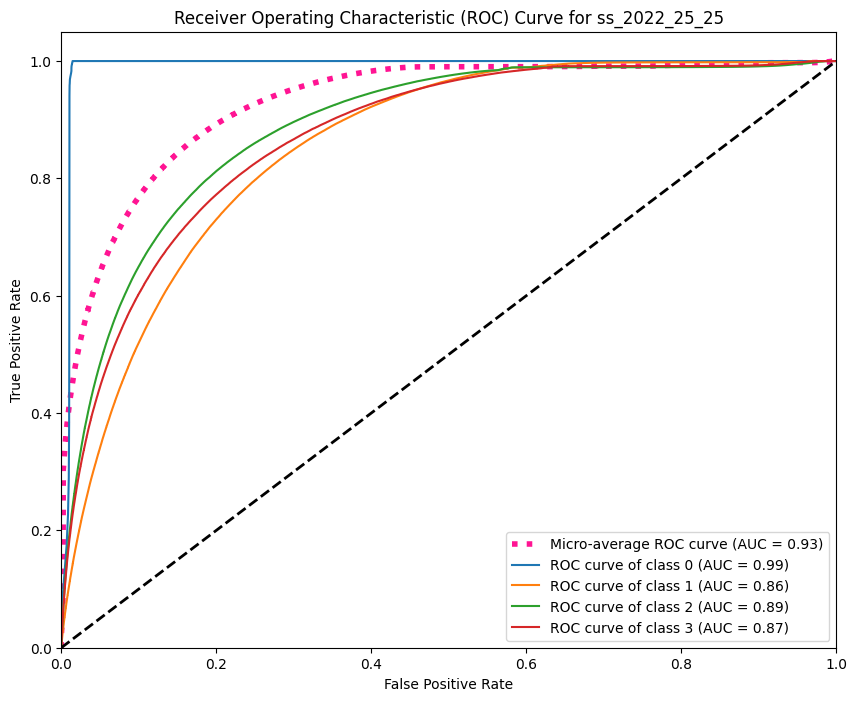

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(true_flat.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(true_flat[:, i], pred_flat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(true_flat.ravel(), pred_flat.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc_micro), color='deeppink', linestyle=':', linewidth=4)

for i in range(true_flat.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ss_2022_25_25')
plt.legend(loc="lower right")
plt.show()


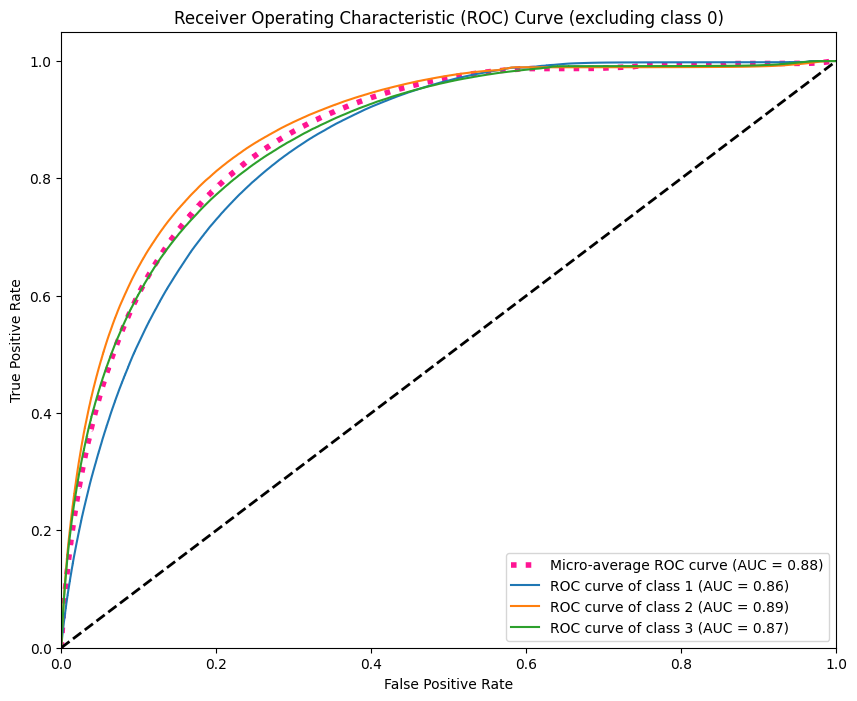

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class except class 0
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1, true_flat.shape[1]):  # Exclude class 0
    fpr[i], tpr[i], _ = roc_curve(true_flat[:, i], pred_flat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC (excluding class 0)
fpr_micro, tpr_micro, _ = roc_curve(true_flat[:, 1:].ravel(), pred_flat[:, 1:].ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc_micro), color='deeppink', linestyle=':', linewidth=4)

for i in range(1, true_flat.shape[1]):  # Exclude class 0
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (excluding class 0)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Compute AUC-ROC for each class
auc_roc = []
for i in range(true_flat[1:].shape[1]):
    y_true_class = true_flat[:, i]
    y_pred_class = pred_flat[:, i]
    auc_roc_class = roc_auc_score(y_true_class[1:], y_pred_class[1:])
    auc_roc.append(auc_roc_class)

# Compute micro-average AUC-ROC
auc_roc_micro = roc_auc_score(true_flat, pred_flat, average='weighted')

print('Test Set AUC-ROC for each class:', auc_roc)
print('Test Set Micro-average AUC-ROC:', auc_roc_micro)


Test Set AUC-ROC for each class: [0.9999800118510421, 0.902184756305453, 0.9253287309922598, 0.9136339515978105]
Test Set Micro-average AUC-ROC: 0.9403712767865395


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, f1_score

# Flatten the predictions and ground truth for ROC curve and F1 score calculations
pred_flat_test = test_preds.reshape(-1, test_preds.shape[-1])
true_flat_test = y_test.reshape(-1, y_test.shape[-1])

# Apply the mask
y_true_masked = np.argmax(true_flat_test, axis=-1)
y_pred_masked = np.argmax(pred_flat_test, axis=-1)

# Compute ROC curve and AUC for each class (considering masking and values > 0)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1, true_flat_test.shape[1]):  # Starting from index 1 because we skip class 0 (masking)
    y_true_class = (y_true_masked == i).astype(int)
    y_pred_class = (y_pred_masked == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true_class, pred_flat_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC (considering masking and values > 0)
fpr_micro, tpr_micro, _ = roc_curve((y_true_masked > 0).astype(int), pred_flat_test[:, 1:].ravel())  # Considering all classes except class 0
roc_auc_micro = auc(fpr_micro, tpr_micro)

print('Test Set AUC-ROC for each class (considering masking and values > 0):', roc_auc)
print('Test Set Micro-average AUC-ROC (considering masking and values > 0):', roc_auc_micro)

# Compute F1 score for each class (considering masking and values > 0)
f1_scores = []
for i in range(1, true_flat_test.shape[1]):  # Starting from index 1 because we skip class 0 (masking)
    y_true_class = (y_true_masked == i).astype(int)
    y_pred_class = (y_pred_masked == i).astype(int)
    f1_score_class = f1_score(y_true_class, y_pred_class)
    f1_scores.append(f1_score_class)

# Compute micro-average F1 score (considering masking and values > 0)
f1_micro = f1_score(y_true_masked > 0, y_pred_masked > 0, average='weighted')

print('Test Set F1 Score for each class (considering masking and values > 0):', f1_scores)
print('Test Set Micro-average F1 Score (considering masking and values > 0):', f1_micro)


ValueError: Found input variables with inconsistent numbers of samples: [1623200, 4869600]

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_classes.flatten(), pred_classes.flatten())

print('Test Set Accuracy:', accuracy)


Test Set Accuracy: 0.7392819419053422


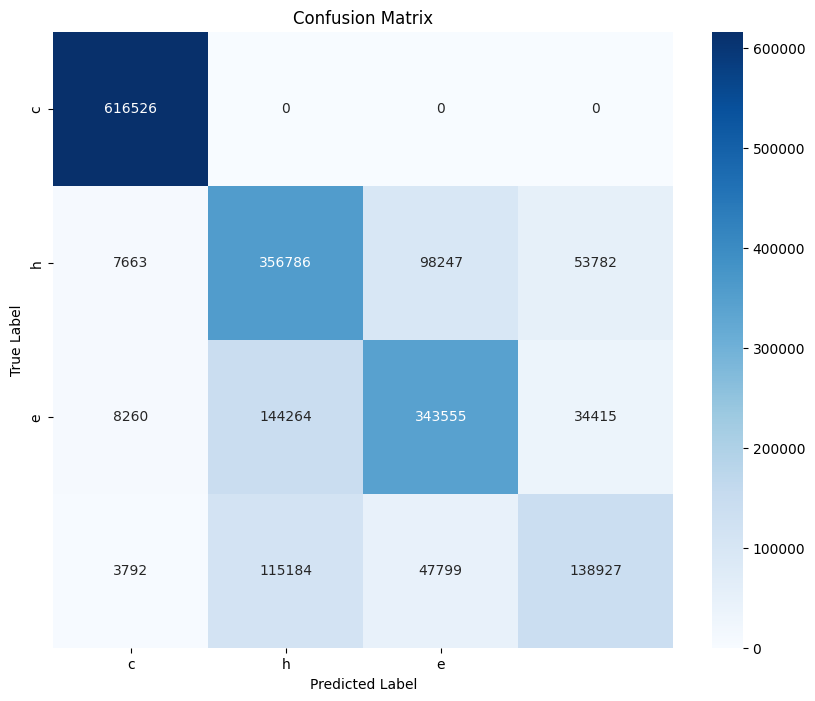

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes.flatten(), pred_classes.flatten())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=decoder.index_word.values(), yticklabels=decoder.index_word.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
## encode the test set
test_kmers = seq2kmers(test_seqs_2520, n = kmer_size)
X_test = encoder.texts_to_sequences(test_kmers)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen, padding = 'post')

# encode the target secondary structures as categorical
y_test = decoder.texts_to_sequences(test_sst3_2520)
y_test = sequence.pad_sequences(y_test, maxlen = maxlen, padding = 'post')
y_test = to_categorical(y_test)

# reversal functions from https://www.kaggle.com/code/helmehelmuto/secondary-structure-prediction-with-keras
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

reverse_decoder_index = {value:key for key,value in decoder.word_index.items()}

In [ ]:
reverse_decoder_index.items()

dict_items([(1, 'c'), (2, 'h'), (3, 'e')])

In [ ]:
# show some examples of actual vs predicted
for index in [1, 10, 100, 1000]:
    actual = onehot_to_seq(y_test[index], reverse_decoder_index)
    predicted = onehot_to_seq(test_preds[index], reverse_decoder_index)
    match = ''.join(['*' if a == p else '-' for a, p in zip(actual, predicted) ])
    acc = q3_acc(y_test[index], test_preds[index])

    print('Example #', index)
    print('Q3 Accuracy: ', np.round(np.sum(acc) / len(acc), 2))
    print('Actual:\t', actual + '\n' +
          'Match:\t\t', match + '\n' +
          'Predicted:\t', predicted + '\n' +
          '\t\t ' + ''.join(['|' if (n + 1) % 10 == 0 else '-' for n in range(len(actual))]))

Example # 1
Q3 Accuracy:  0.65
Actual:	 cchhhccccccccccchhhcceeeeeeccccceeeeeeccccccccccccchhhhhhhhc
Match:		 **---***********---**-**********------*************--------*
Predicted:	 cccceccccccccccccccccceeeeeccccccccccccccccccccccccccccccccc
		 ---------|---------|---------|---------|---------|---------|
Example # 10
Q3 Accuracy:  0.75
Actual:	 ccccceeeecccecccccceccecccceeeeeeecccceeeeeecceeeeeehhheeecc
Match:		 *********---*******-----********************-*-****----**-**
Predicted:	 ccccceeeeeeeeccccccceehhccceeeeeeecccceeeeeeecceeeeccceeeccc
		 ---------|---------|---------|---------|---------|---------|
Example # 100
Q3 Accuracy:  0.62
Actual:	 cceccceeeeeeeeeeeeccceeeeeeeehhhceeeeeeehhhhhhhcccccceeeeeechhhceeec
Match:		 **-***-----*****--*--********---*-******---**********---***-----**-*
Predicted:	 ccccccccccceeeeeccceeeeeeeeeeccccceeeeeeccchhhhccccccccceeeeeeceeecc
		 ---------|---------|---------|---------|---------|---------|--------
Example # 1000
Q3 Accuracy:  0.56
Actual:

In [ ]:
test_preds = lstm_60_180_model.predict(X_test)


104/104 [==============================] - 13s 129ms/step


In [ ]:
test_preds

array([[[1.97536167e-04, 9.15355325e-01, 3.14674862e-02, 5.29797189e-02],
        [1.90360210e-04, 8.89217198e-01, 4.15491126e-02, 6.90433234e-02],
        [3.93782160e-04, 7.52548754e-01, 4.42909896e-02, 2.02766508e-01],
        ...,
        [9.99996722e-01, 1.68765926e-08, 4.67518602e-12, 3.19995229e-06],
        [9.99988496e-01, 2.00145429e-08, 1.54740405e-11, 1.14828963e-05],
        [9.99810696e-01, 1.14579272e-07, 2.75182543e-10, 1.89165396e-04]],

       [[4.79412229e-05, 8.12360168e-01, 1.19519792e-01, 6.80721849e-02],
        [4.96685243e-05, 7.88642585e-01, 1.38592735e-01, 7.27150217e-02],
        [9.15993223e-05, 6.39596879e-01, 1.70398161e-01, 1.89913362e-01],
        ...,
        [9.99996722e-01, 1.68765926e-08, 4.67518602e-12, 3.19995547e-06],
        [9.99988496e-01, 2.00145038e-08, 1.54740405e-11, 1.14828963e-05],
        [9.99810696e-01, 1.14579379e-07, 2.75182543e-10, 1.89165396e-04]],

       [[3.71842980e-05, 9.24407959e-01, 2.49447357e-02, 5.06102107e-02],
        

In [ ]:
# Define the q3_acc function
def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)

# Gather all true and predicted labels accounting for the mask
all_true = []
all_pred = []
for i, pred in enumerate(test_preds):
    true_labels, pred_labels = q3_acc(y_test[i], pred)
    all_true.extend(true_labels.numpy())
    all_pred.extend(pred_labels.numpy())

In [ ]:
# Flatten the one-hot encoded true labels and predictions
y_true = [onehot_to_class(y) for y in y_test]
y_pred = [onehot_to_class(p) for p in test_preds]

# Flatten the list of arrays into a single array
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

print(y_true, y_pred)

[1 1 3 ... 1 1 1] [1 1 1 ... 1 1 1]


In [ ]:
all_true[1], all_pred[1]

(1, 1)

102/102 [==============================] - 9s 85ms/step
Accuracy: 0.74
Precision: 0.73
Recall: 0.72
F1 Score: 0.72


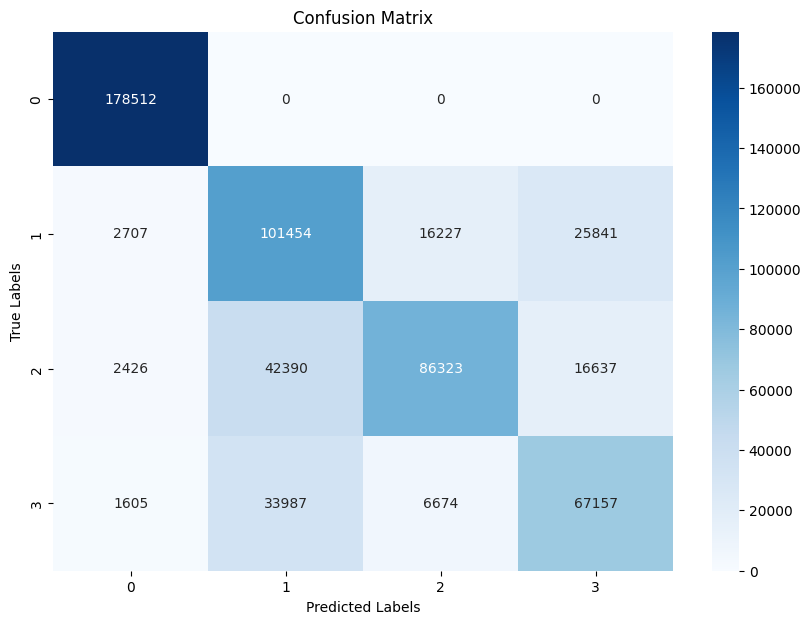

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert one-hot encoded predictions to class labels
def onehot_to_class(oh_seq):
    return np.argmax(oh_seq, axis=-1)

test_preds = lstm_60_180_model.predict(X_test)

# Flatten the one-hot encoded true labels and predictions
y_true = [onehot_to_class(y) for y in y_test]
y_pred = [onehot_to_class(p) for p in test_preds]

# Flatten the list of arrays into a single array
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute other metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # 'macro' can be changed based on your class distribution
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


102/102 [==============================] - 14s 136ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.63
Precision: 0.49
Recall: 0.47
F1 Score: 0.48


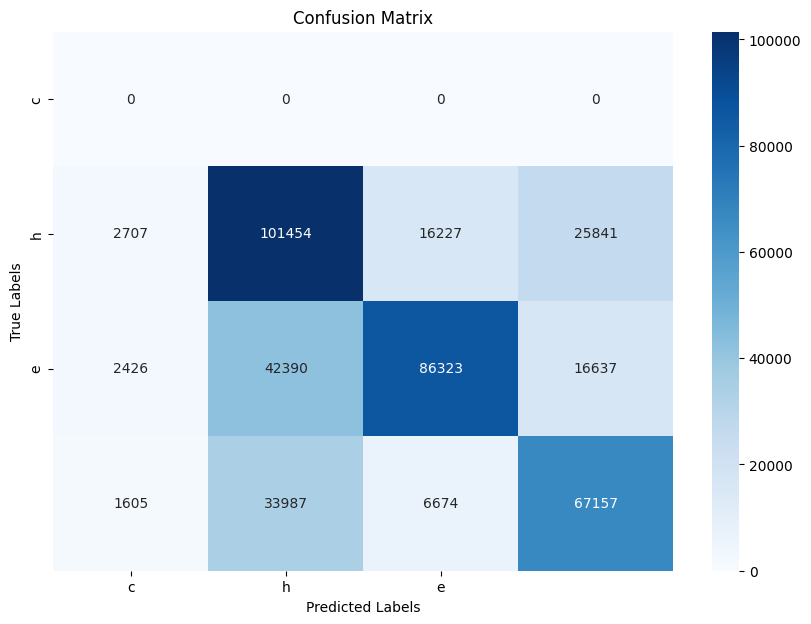

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

test_preds = lstm_60_180_model.predict(X_test)

# Define the q3_acc function
def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)

# Gather all true and predicted labels accounting for the mask
all_true = []
all_pred = []
for i, pred in enumerate(test_preds):
    true_labels, pred_labels = q3_acc(y_test[i], pred)
    all_true.extend(true_labels.numpy())
    all_pred.extend(pred_labels.numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_true, all_pred)

# Calculate accuracy, precision, recall, and F1-score
report = classification_report(all_true, all_pred, output_dict=True)

print(f"Accuracy: {report['accuracy']:.2f}")
print(f"Precision: {report['macro avg']['precision']:.2f}")
print(f"Recall: {report['macro avg']['recall']:.2f}")
print(f"F1 Score: {report['macro avg']['f1-score']:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=reverse_decoder_index.values(), yticklabels=reverse_decoder_index.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
y_pred[1]

1

In [ ]:
np.load('/content/drive/MyDrive/597/secdataset/CB513.npy')

<ipython-input-99-979e3a7d877f>:1: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  np.load('/content/drive/MyDrive/597/secdataset/CB513.npy')


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.26894142, 0.17364665,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.26894142, 0.01945508,
        0.        ]])

In [ ]:
# Filter to ensure only 'c', 'e', 'h' are considered
valid_classes = {'c', 'e', 'h'}
filtered_decoder_index = {key: val for key, val in reverse_decoder_index.items() if val in valid_classes}

# Update the function to use only valid classes
def onehot_to_class(oh_seq, valid_indices):
    class_indices = np.argmax(oh_seq, axis=-1)
    return [idx for idx in class_indices if idx in valid_indices]

valid_indices = set(filtered_decoder_index.keys())


In [ ]:
reverse_decoder_index.items()

dict_items([(1, 'c'), (2, 'h'), (3, 'e')])

In [ ]:
# Adjustments to predictions
y_true_filtered = [onehot_to_class(y, valid_indices) for y in y_test]
y_pred_filtered = [onehot_to_class(p, valid_indices) for p in test_preds]

# Flatten the list of arrays into a single array
y_true_filtered = np.concatenate(y_true_filtered)
y_pred_filtered = np.concatenate(y_pred_filtered)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Compute the confusion matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered)

# Compute other metrics
accuracy = accuracy_score(y_true_filtered, y_pred_filtered)
precision = precision_score(y_true_filtered, y_pred_filtered, average='macro')
recall = recall_score(y_true_filtered, y_pred_filtered, average='macro')
f1 = f1_score(y_true_filtered, y_pred_filtered, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


ValueError: Found input variables with inconsistent numbers of samples: [420321, 420280]